<a href="https://colab.research.google.com/github/Basakrana/Social-Media-Emotion-Classifier/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
df1 = pd.read_csv('/content/test.csv')
df2 = pd.read_csv('/content/train.csv')

In [ ]:
df1.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [ ]:
df2.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    object
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(4)
memory usage: 8.2+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
df2.dropna(axis = 0, inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


In [ ]:
full_data = pd.concat([df1, df2], axis=0, ignore_index=True)
print(full_data.shape)

(1103, 10)


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1103 non-null   object 
 1   Age                         1103 non-null   object 
 2   Gender                      1103 non-null   object 
 3   Platform                    1103 non-null   object 
 4   Daily_Usage_Time (minutes)  1103 non-null   float64
 5   Posts_Per_Day               1103 non-null   float64
 6   Likes_Received_Per_Day      1103 non-null   float64
 7   Comments_Received_Per_Day   1103 non-null   float64
 8   Messages_Sent_Per_Day       1103 non-null   float64
 9   Dominant_Emotion            1103 non-null   object 
dtypes: float64(5), object(5)
memory usage: 86.3+ KB


In [ ]:
full_data.drop(['User_ID'], axis=1, inplace=True)

In [ ]:
df = full_data.copy()

In [ ]:
for col in full_data.columns:
    print(f"\nColumn: {col}")
    print(full_data[col].unique())


Column: Age
['27' '21' '28' '25' '24' '33' '32' '23' '35' '31' '34' '29' '22' '26'
 '30' 'Male' 'Female' 'Non-binary']

Column: Gender
['Female' 'Non-binary' 'Male' '27' 'Marie' '24' '29' '33' '31' '22' '25'
 '28' '30' '23' '34' '26' '35' '21' '32']

Column: Platform
['Snapchat' 'Telegram' 'Facebook' 'Instagram' 'LinkedIn' 'Twitter'
 'Whatsapp']

Column: Daily_Usage_Time (minutes)
[120.  60. 115. 105.  55. 160.  85.  45. 140.  70.  50.  65. 145.  95.
  80.  90. 165.  75. 100. 175. 130.  40. 200. 110. 150. 170. 180. 125.
 190. 155.]

Column: Posts_Per_Day
[4. 1. 3. 6. 5. 2. 7. 8.]

Column: Likes_Received_Per_Day
[ 40.  18.  38.  48.  17.  85.  33.  10.  70.  25.  75.  13.  15.  20.
  14.  50.  22.  30.  11.  12.  37.  45.  80.   8.  24.  23.  60.  28.
   9.  27. 100.  72.   5.  21.  35. 110.  90.  55.  95.   6.  88.  78.
  29.  36.  65. 105.  43.  42.  83.]

Column: Comments_Received_Per_Day
[18.  7. 20. 26.  5. 22. 12. 28.  8. 10.  6. 13. 14. 30.  4. 25. 16. 15.
 11.  2. 33.  9. 40. 1

In [ ]:


# Function to check numeric
def is_number(x):
    try:
        float(x)
        return True
    except:
        return False

for i in df.index:
    age = df.loc[i, "Age"]
    gender = df.loc[i, "Gender"]

    # If Gender is numeric and Age is not
    if is_number(gender) and not is_number(age):
        df.loc[i, "Age"] = gender
        df.loc[i, "Gender"] = age

    # If Gender is numeric and Age is empty
    elif is_number(gender):
        df.loc[i, "Age"] = gender
        df.loc[i, "Gender"] = None


In [ ]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Age
['27' '21' '28' '25' '24' '33' '32' '23' '35' '31' '34' '29' '22' '26'
 '30']

Column: Gender
['Female' 'Non-binary' 'Male' 'Marie']

Column: Platform
['Snapchat' 'Telegram' 'Facebook' 'Instagram' 'LinkedIn' 'Twitter'
 'Whatsapp']

Column: Daily_Usage_Time (minutes)
[120.  60. 115. 105.  55. 160.  85.  45. 140.  70.  50.  65. 145.  95.
  80.  90. 165.  75. 100. 175. 130.  40. 200. 110. 150. 170. 180. 125.
 190. 155.]

Column: Posts_Per_Day
[4. 1. 3. 6. 5. 2. 7. 8.]

Column: Likes_Received_Per_Day
[ 40.  18.  38.  48.  17.  85.  33.  10.  70.  25.  75.  13.  15.  20.
  14.  50.  22.  30.  11.  12.  37.  45.  80.   8.  24.  23.  60.  28.
   9.  27. 100.  72.   5.  21.  35. 110.  90.  55.  95.   6.  88.  78.
  29.  36.  65. 105.  43.  42.  83.]

Column: Comments_Received_Per_Day
[18.  7. 20. 26.  5. 22. 12. 28.  8. 10.  6. 13. 14. 30.  4. 25. 16. 15.
 11.  2. 33.  9. 40. 19. 23.  3. 17. 35. 38. 36.]

Column: Messages_Sent_Per_Day
[22. 12. 27. 28. 30. 18. 33. 10. 17. 15. 35. 2

In [ ]:
df.drop(df[df['Gender']=='Marie'].index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 0 to 1102
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1102 non-null   object 
 1   Gender                      1102 non-null   object 
 2   Platform                    1102 non-null   object 
 3   Daily_Usage_Time (minutes)  1102 non-null   float64
 4   Posts_Per_Day               1102 non-null   float64
 5   Likes_Received_Per_Day      1102 non-null   float64
 6   Comments_Received_Per_Day   1102 non-null   float64
 7   Messages_Sent_Per_Day       1102 non-null   float64
 8   Dominant_Emotion            1102 non-null   object 
dtypes: float64(5), object(4)
memory usage: 86.1+ KB


In [ ]:
for col in df.select_dtypes(include="object").columns:
    print(f"\nValue counts for {col}")
    print(df[col].value_counts())


Value counts for Age
Age
27    113
28    113
29    110
22     84
31     80
26     78
25     76
24     76
21     65
33     63
23     61
30     53
32     44
34     43
35     43
Name: count, dtype: int64

Value counts for Gender
Gender
Male          407
Female        395
Non-binary    300
Name: count, dtype: int64

Value counts for Platform
Platform
Instagram    265
Twitter      219
Facebook     215
LinkedIn     135
Snapchat      93
Telegram      91
Whatsapp      84
Name: count, dtype: int64

Value counts for Dominant_Emotion
Dominant_Emotion
Neutral      227
Happiness    214
Anxiety      192
Sadness      174
Boredom      156
Anger        139
Name: count, dtype: int64


In [ ]:
df["Age"] = df["Age"].astype(int)

In [ ]:
for col in df.select_dtypes(include="number").columns:
    print(f"\nValue counts for {col}")
    print(df[col].describe())


Value counts for Age
count    1102.000000
mean       27.492740
std         3.900609
min        21.000000
25%        24.000000
50%        27.000000
75%        30.000000
max        35.000000
Name: Age, dtype: float64

Value counts for Daily_Usage_Time (minutes)
count    1102.000000
mean       95.176951
std        38.480335
min        40.000000
25%        65.000000
50%        85.000000
75%       120.000000
max       200.000000
Name: Daily_Usage_Time (minutes), dtype: float64

Value counts for Posts_Per_Day
count    1102.000000
mean        3.276770
std         1.902383
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: Posts_Per_Day, dtype: float64

Value counts for Likes_Received_Per_Day
count    1102.000000
mean       39.259528
std        26.139112
min         5.000000
25%        18.000000
50%        30.000000
75%        50.000000
max       110.000000
Name: Likes_Received_Per_Day, dtype: float64

Value counts for Comments_Recei

In [ ]:
df.duplicated().sum()

np.int64(894)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         208 non-null    int64  
 1   Gender                      208 non-null    object 
 2   Platform                    208 non-null    object 
 3   Daily_Usage_Time (minutes)  208 non-null    float64
 4   Posts_Per_Day               208 non-null    float64
 5   Likes_Received_Per_Day      208 non-null    float64
 6   Comments_Received_Per_Day   208 non-null    float64
 7   Messages_Sent_Per_Day       208 non-null    float64
 8   Dominant_Emotion            208 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 16.2+ KB


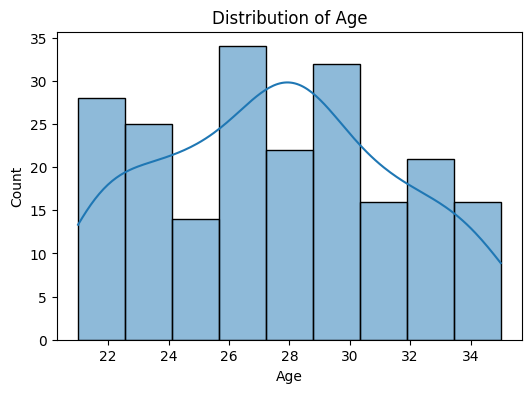

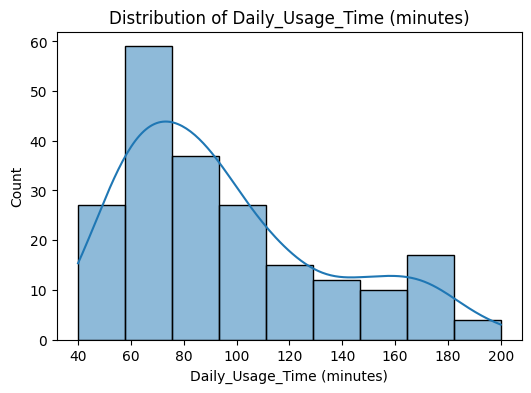

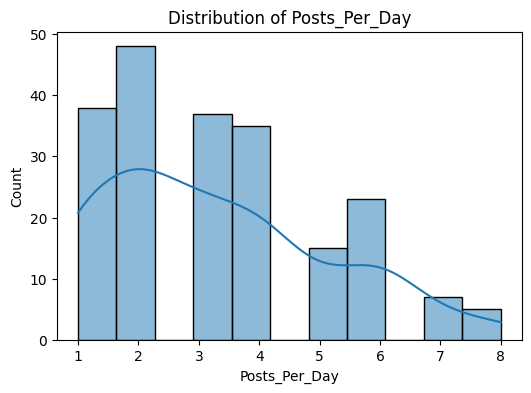

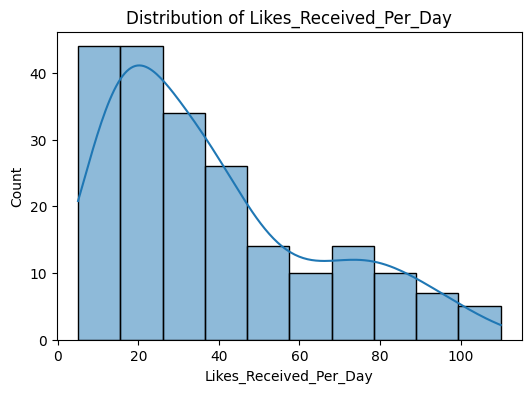

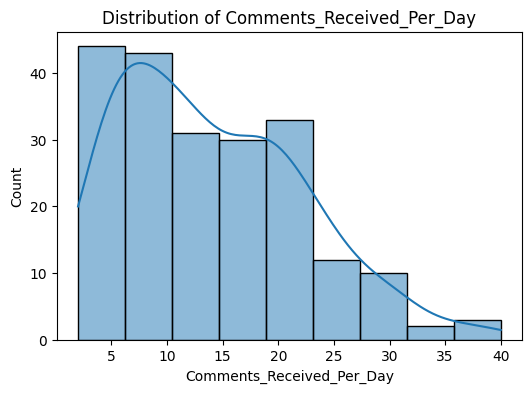

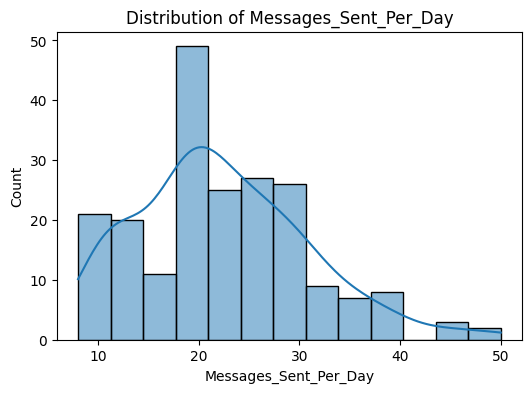

In [ ]:
numeric_cols = df.select_dtypes(include=["int64", "float64", "Int64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
likes_bins = [0, 10, 20, 30, 50, 70, 90, 110]
likes_labels = [
    "0-10", "10-20", "20-30", "30-50",
    "50-70", "70-90", "90-110"
]

df["Likes_Category"] = pd.cut(
    df["Likes_Received_Per_Day"],
    bins=likes_bins,
    labels=likes_labels,
    include_lowest=True
)


In [ ]:
comments_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
comments_labels = [
    "0-5", "5-10", "10-15", "15-20",
    "20-25", "25-30", "30-35", "35-40"
]

df["Comments_Category"] = pd.cut(
    df["Comments_Received_Per_Day"],
    bins=comments_bins,
    labels=comments_labels,
    include_lowest=True
)


In [ ]:
messages_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50]
messages_labels = [
    "0-5", "5-10", "10-15", "15-20",
    "20-25", "25-30", "30-40", "40-50"
]

df["Messages_Category"] = pd.cut(
    df["Messages_Sent_Per_Day"],
    bins=messages_bins,
    labels=messages_labels,
    include_lowest=True
)


In [ ]:
print(df["Likes_Category"].value_counts())
print(df["Comments_Category"].value_counts())
print(df["Messages_Category"].value_counts())


Likes_Category
10-20     52
30-50     50
20-30     37
70-90     24
50-70     19
0-10      18
90-110     8
Name: count, dtype: int64
Comments_Category
5-10     52
15-20    40
10-15    39
0-5      35
20-25    24
25-30    13
35-40     3
30-35     2
Name: count, dtype: int64
Messages_Category
15-20    52
20-25    44
25-30    34
10-15    32
30-40    24
5-10     17
40-50     5
0-5       0
Name: count, dtype: int64


In [ ]:
df["Messages_Category"] = df["Messages_Category"].replace(
    {"0-5": "0-10", "5-10": "0-10"}
)


/tmp/ipython-input-3425770120.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Messages_Category"] = df["Messages_Category"].replace(


In [ ]:
print(df["Messages_Category"].value_counts())


Messages_Category
15-20    52
20-25    44
25-30    34
10-15    32
30-40    24
0-10     17
40-50     5
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 300
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         208 non-null    int64   
 1   Gender                      208 non-null    object  
 2   Platform                    208 non-null    object  
 3   Daily_Usage_Time (minutes)  208 non-null    float64 
 4   Posts_Per_Day               208 non-null    float64 
 5   Likes_Received_Per_Day      208 non-null    float64 
 6   Comments_Received_Per_Day   208 non-null    float64 
 7   Messages_Sent_Per_Day       208 non-null    float64 
 8   Dominant_Emotion            208 non-null    object  
 9   Likes_Category              208 non-null    category
 10  Comments_Category           208 non-null    category
 11  Messages_Category           208 non-null    category
dtypes: category(3), float64(5), int64(1), object(3)
memory usage: 17.9+ KB


In [ ]:
df.drop(columns = ['Likes_Received_Per_Day','Comments_Received_Per_Day','Messages_Sent_Per_Day'],axis = 1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         208 non-null    int64   
 1   Gender                      208 non-null    object  
 2   Platform                    208 non-null    object  
 3   Daily_Usage_Time (minutes)  208 non-null    float64 
 4   Posts_Per_Day               208 non-null    float64 
 5   Dominant_Emotion            208 non-null    object  
 6   Likes_Category              208 non-null    category
 7   Comments_Category           208 non-null    category
 8   Messages_Category           208 non-null    category
dtypes: category(3), float64(2), int64(1), object(3)
memory usage: 13.0+ KB


In [ ]:
X = df.drop("Dominant_Emotion", axis=1)
y = df["Dominant_Emotion"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Separate feature types
categorical_features = X.select_dtypes(include=["object", "category"]).columns
numeric_features = X.select_dtypes(include=["int64", "float64", "Int64"]).columns


In [ ]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])


In [ ]:
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),

    # Bagging (simple)
    "Bagging (DT)": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42
    ),

    # Boosting (lightweight)
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
    ),

    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [ ]:

results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_macro": f1_score(y_test, y_pred, average="macro")
    })

results_df = pd.DataFrame(results).sort_values("F1_macro", ascending=False)
print(results_df)


                 Model  Accuracy  F1_macro
4         Bagging (DT)  0.738095  0.736111
2        Decision Tree  0.714286  0.709496
3        Random Forest  0.571429  0.565527
6                  SVM  0.500000  0.484972
1                  KNN  0.452381  0.442023
5             AdaBoost  0.380952  0.346849
0  Logistic Regression  0.357143  0.329630
7          Naive Bayes  0.333333  0.231659


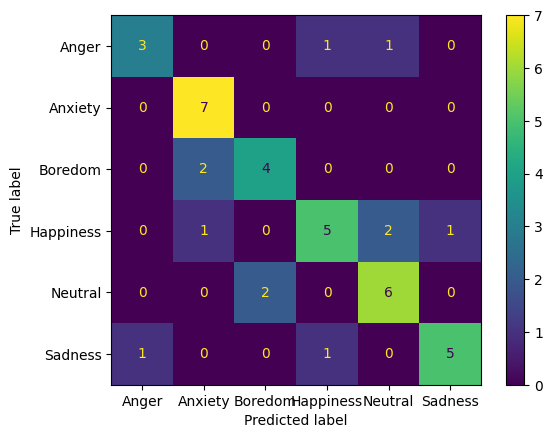

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

best_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", models["Decision Tree"])
])

best_pipe.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(best_pipe, X_test, y_test)


main result

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    best_pipe, X, y, cv=10, scoring="f1_macro"
)

print("CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())


CV F1 scores: [0.87830688 0.8968254  0.86904762 0.73915344 0.83148148 0.75992063
 0.95767196 0.89166667 0.84722222 0.87433862]
Mean CV F1: 0.8545634920634921


In [ ]:
final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

final_pipe.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Platform', 'Likes_Category', 'Comments_Category',
       'Messages_Category'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
import joblib

joblib.dump(final_pipe, "emotion_classifier_pipeline.pkl")


['emotion_classifier_pipeline.pkl']

In [ ]:
df.sample(5)

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Dominant_Emotion,Likes_Category,Comments_Category,Messages_Category
23,25,Male,Telegram,80.0,4.0,Neutral,20-30,10-15,20-25
156,33,Female,Instagram,145.0,4.0,Sadness,50-70,15-20,30-40
239,33,Female,Instagram,170.0,7.0,Happiness,90-110,25-30,30-40
158,22,Female,Whatsapp,70.0,2.0,Anxiety,30-50,5-10,20-25
175,21,Non-binary,Facebook,55.0,3.0,Neutral,10-20,0-5,10-15
